<a href="https://colab.research.google.com/github/Rutikj9284/DAV/blob/main/DAV04%2C_05%2C_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("stock_data.csv",
                 parse_dates=True,
                 index_col="Date")

# displaying the first five rows of dataset
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


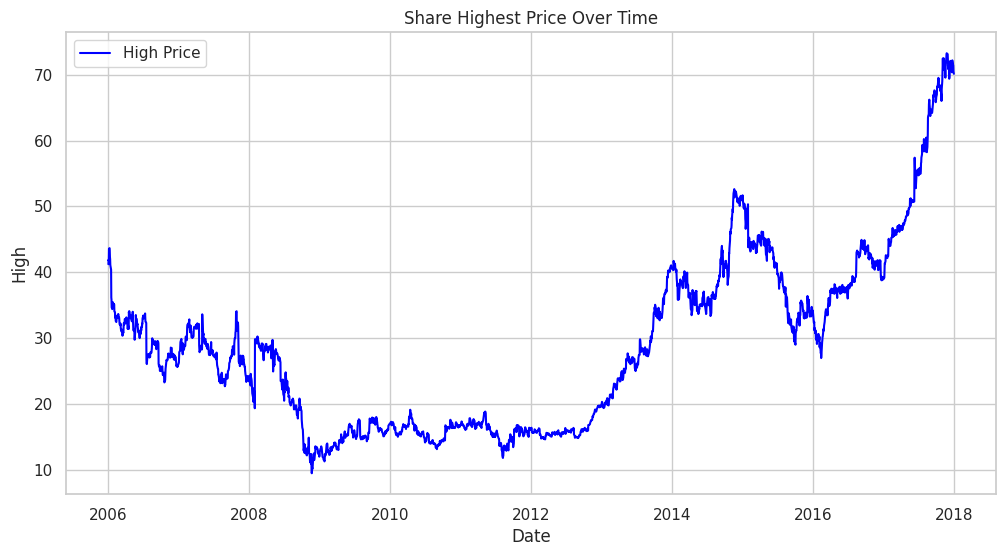

In [ ]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

Resampling :- To get more clear insights from data

<ipython-input-5-6f6022129035>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()  # Resampling to monthly frequency, using mean as an aggregation function


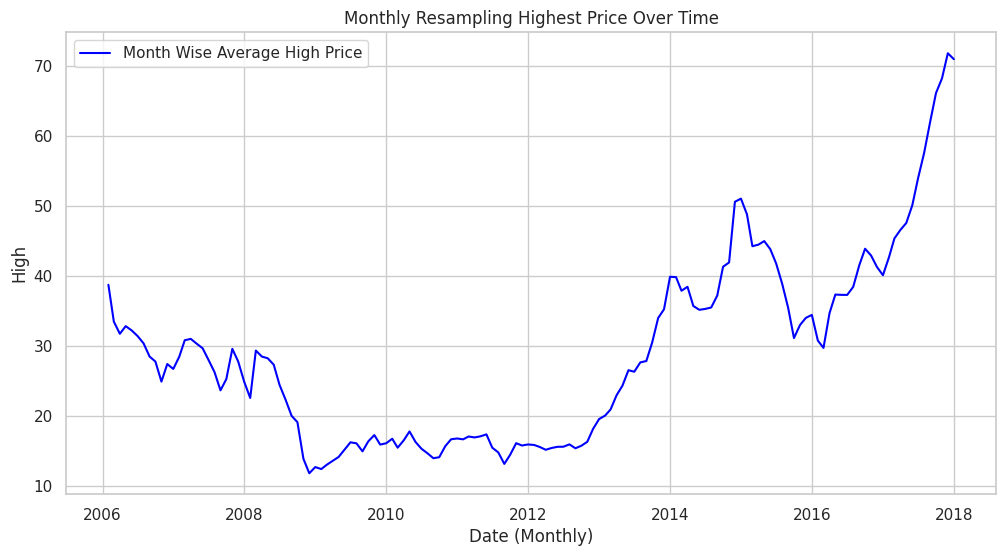

In [ ]:
df_resampled = df.resample('M').mean()  # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

Autocorrelation Function (ACF) :- To detect seasonality

<Figure size 1200x600 with 0 Axes>

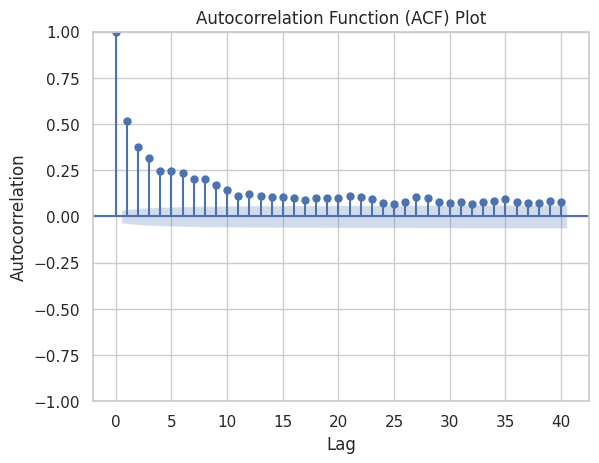

In [ ]:
# # If 'Date' is a column, but not the index, you can set it as the index
# df.set_index('Date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Partial ACF (PACF)

<Figure size 1200x600 with 0 Axes>

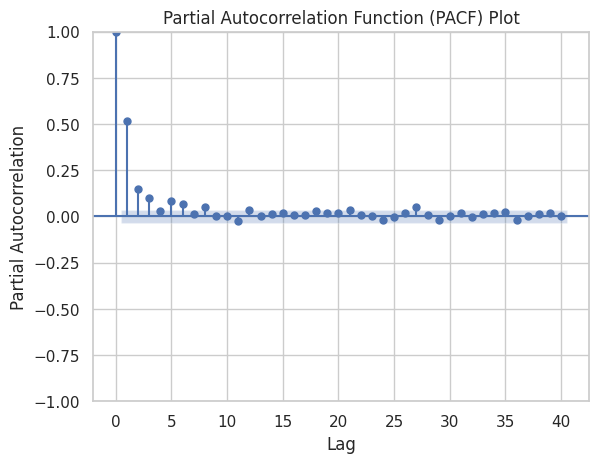

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Volume'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()


ARIMA Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB
None


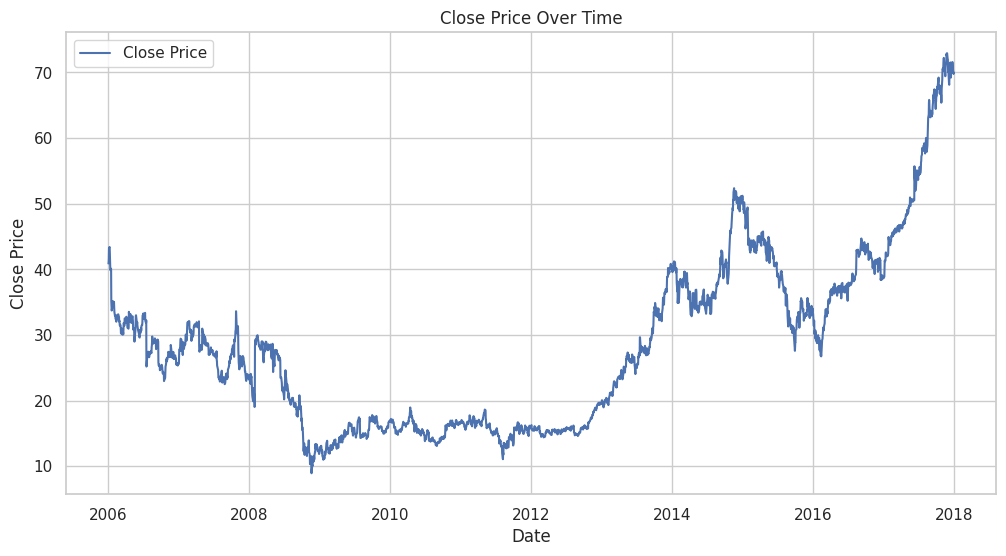

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# Stationarity check
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.9478981895596861
p-value: 0.9936846299287978


In [ ]:
# Apply differencing
df['Close_diff'] = df['Close'].diff().dropna()

In [ ]:
# Apply differencing and drop NaN values
df['Close_diff'] = df['Close'].diff()
df.dropna(subset=['Close_diff'], inplace=True)

In [ ]:
# Stationarity check after differencing
result_diff = adfuller(df['Close_diff'])
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -12.44756532607074
p-value after differencing: 3.6357795917205046e-23


<Figure size 1200x600 with 0 Axes>

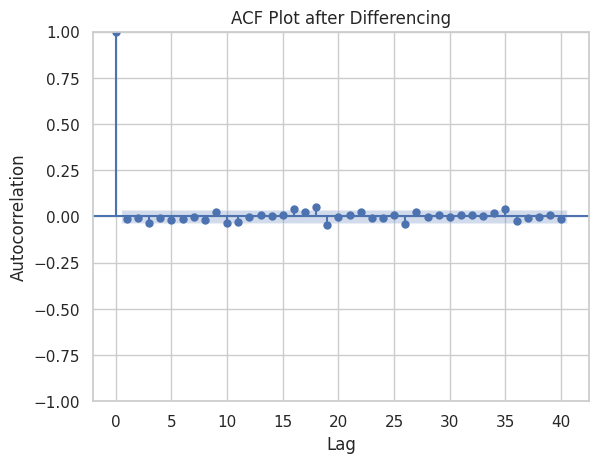

In [ ]:
# ACF and PACF plots after differencing
plt.figure(figsize=(12, 6))
plot_acf(df['Close_diff'], lags=40, title='ACF Plot after Differencing')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

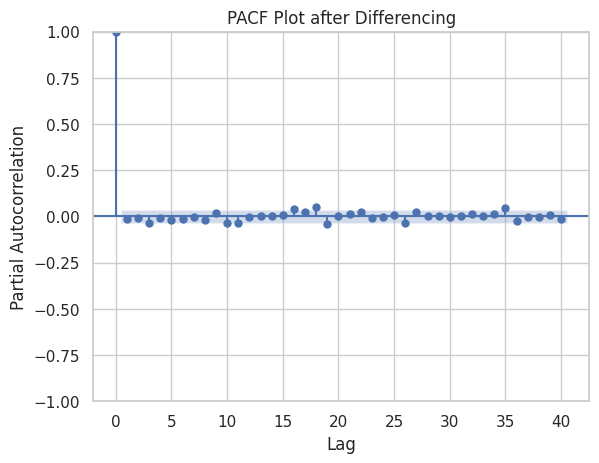

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(df['Close_diff'], lags=40, title='PACF Plot after Differencing')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
# Model fitting
model = ARIMA(df['Close_diff'], order=(p, d, q))
results = model.fit()

NameError: name 'p' is not defined